# Setup and Data Loading

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load fashion mnist dataset
ds = tfds.load('fashion_mnist', split='train')

# Data Analysis

In [3]:
ds.as_numpy_iterator().next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

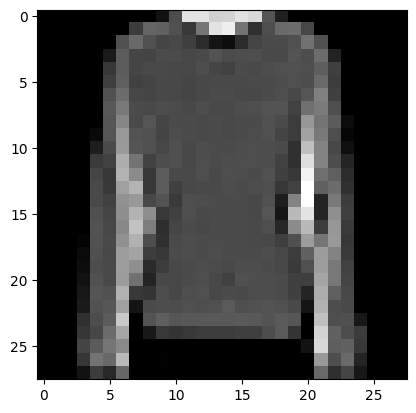

In [4]:
# Display an image
plt.imshow(ds.as_numpy_iterator().next()['image'], cmap='gray')
plt.show()

In [5]:
def scale_images(data):
    image = data['image']
    return image / 255

In [6]:
# MACSHBAP
# Reload the dataset
ds = tfds.load('fashion_mnist', split='train')
# scale the images
ds = ds.map(scale_images)
# cache
ds = ds.cache()
# shuffle
ds = ds.shuffle(60000)
# batch
ds = ds.batch(128)
# prefetch
ds = ds.prefetch(64)

In [7]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# Build the Neural Network

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Dropout, UpSampling2D, LeakyReLU, Reshape

In [9]:
# Build Generator
def build_generator():
    model = Sequential()
    # 128 inputs
    model.add(Dense(7*7*128, input_dim=128)) 
    # This layer takes a 128-dimensional input and converts it into a flat representation of shape (7*7*128,). 
    # This is typically the first step in generating an image from a random noise vector.
    
    # Leaky ReLU
    model.add(LeakyReLU(alpha=0.2))
    # leaky ReLU is used to avoid the dying ReLU problem.
    
    # Reshape
    model.add(Reshape((7, 7, 128)))
    # Reshaping the flat representation back into a 3D tensor shape (7, 7, 128). 
    # This prepares the data for the subsequent convolutional layers.
    
    # UpSampling block 1
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # Gradually upsamples the spatial dimensions and applies convolutional layers to increase the depth. 
    # This helps in capturing more complex patterns and structures.
    
    # UpSampling block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    # Convolutional 2D layer 1
    model.add(Conv2D(128, 4, padding='same')) # 128 channels, 4x4 kernel size
    model.add(LeakyReLU(alpha=0.2))
    
    # Convolutional 2D layer 2
    model.add(Conv2D(128, 4, padding='same')) # 128 filters, 5x5 kernel size
    model.add(LeakyReLU(alpha=0.2))
    
    # final Convolutional 2D layer
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid')) # 1 filter, 4x4 kernel size
    # Produces the output image with a single channel (grayscale) and 
    # applies the sigmoid activation function to squash the output values between 0 and 1, which is typical for image generation tasks.
    
    return model

In [10]:
generator = build_generator()

c:\Users\Gokuleshwaran\Desktop\35-Projects\40. Generative Adversarial Neural Network\.venv\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Gokuleshwaran\Desktop\35-Projects\40. Generative Adversarial Neural Network\.venv\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [11]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6272)           │       809,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


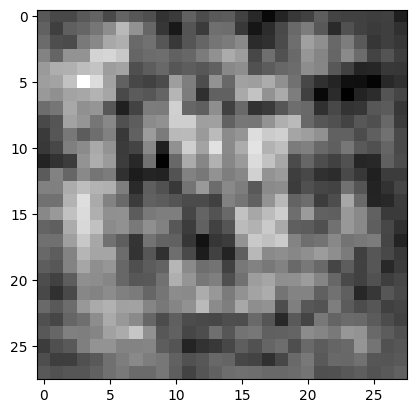

In [12]:
# Generate Image
img = generator.predict(tf.random.normal([1, 128]))
img.shape
# display the image
plt.imshow(img[0, :, :, 0], cmap='gray')
plt.show()

In [13]:
# Build Discriminator
def build_discriminator():
    model = Sequential()
    
    # Convolutional 2D layer 1
    model.add(Conv2D(32, 5, input_shape=(28, 28, 1)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    # Convolutional 2D layer 2
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    # Convolutional 2D layer 3
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    # Convolutional 2D layer 4
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    # Flatten
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [14]:
discriminator = build_discriminator()
discriminator.summary()

c:\Users\Gokuleshwaran\Desktop\35-Projects\40. Generative Adversarial Neural Network\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 20, 20, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        36,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
discriminator.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


array([[0.5005721]], dtype=float32)

# Custom Training Loop

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [17]:
g_opt = Adam(learning_rate=0.0001)
g_loss = BinaryCrossentropy()

In [18]:
d_opt = Adam(learning_rate=0.00001) # learning rate is lower than the generator, as the discriminator is updated more frequently, and we want to avoid instability.
d_loss = BinaryCrossentropy()

In [19]:
from tensorflow.keras.models import Model

In [20]:
class GAN(Model):
    def __init__(self, discriminator, generator, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.discriminator = discriminator
        self.generator = generator
    
    def compile(self, d_opt, g_opt, d_loss, g_loss, *args, **kwargs):
        super().compile(*args, **kwargs)
        self.d_opt = d_opt
        self.g_opt = g_opt
        self.d_loss = d_loss
        self.g_loss = g_loss
        
    def train_step(self, batch): # it takes batch of data
        real_images = batch 
        fake_images = self.generator(tf.random.normal((128,128,1)), training=False)
        
        # Training the discriminator
        with tf.GradientTape() as d_tape:
            # Pass the real and fake images to discriminator model
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create lables for real and fake images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSS 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
        
        # Apply backpropagation
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Training the generator
        with tf.GradientTape() as g_tape:
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
            # Calculate loss: - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)
            # zero: real, one: fake
            
        # Apply back propagation
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [21]:
model = GAN(discriminator=discriminator, generator=generator)

In [22]:
model.compile(d_opt, g_opt, d_loss, g_loss)

# Callbacks

In [23]:
import os
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import array_to_img

In [24]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

# Training

In [25]:
# Recommend 2000 epochs, pass entrie ds
hist = model.fit(ds.take(1), epochs=10, callbacks=[ModelMonitor()])

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - d_loss: 0.6937 - g_loss: 0.6937 - loss: 0.0000e+00
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - d_loss: 0.6891 - g_loss: 0.6928 - loss: 0.0000e+00
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - d_loss: 0.6948 - g_loss: 0.6922 - loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - d_loss: 0.6942 - g_loss: 0.6918 - loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - d_loss: 0.6913 - g_loss: 0.6912 - loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - d_loss: 0.6886 - g_loss: 0.6910 - loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - d_loss: 0.6863 - g_loss: 0.6912 - loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - d_loss: 0.6933 - g_loss: 0.6919 - loss: 0.0000e+00
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - d_loss: 0.6971 - g_loss: 0.6935 - loss: 0.0000e+00
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - d_loss: 0.6910 - g_loss: 0.6960 - loss: 0.0000e+00

# Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


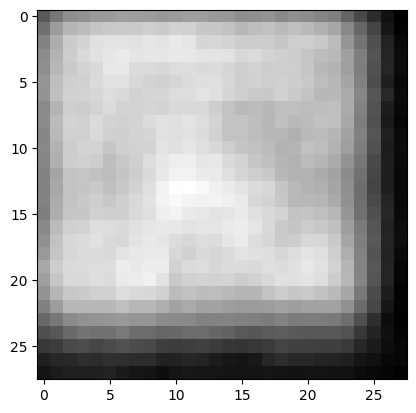

In [32]:
# Generate Image
img = model.generator.predict(tf.random.normal([1, 128]))
img.shape
# display the image
plt.imshow(img[0, :, :, 0], cmap='gray')
plt.show()

In [33]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')